##Problem Statement:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.1) Read the dataset. Do the descriptive statistics and do null value condition check.**

**Data Ingesion**

**Importing Required Library**

In [209]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/Datasets') #SHARMAN

#os.chdir('/content') #MAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [210]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Reading the Data**

In [211]:
df = pd.read_excel('Election_Data.xlsx', sheet_name=1)

In [212]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


**Descriptive Analysis of Dataset**

In [ ]:
df.describe(include = "all")

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


**Looking at the Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**Data Dictionary**

In [214]:
dict = pd.read_excel('Election_Data.xlsx', sheet_name=0)
dict
#1. vote: Party choice: Conservative or Labour
#2. age: in years
#3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
#4. economic.cond.household: Assessment of current household economic conditions, 1 to 5. 
#5. Blair: Assessment of the Labour leader, 1 to 5.
#6. Hague: Assessment of the Conservative leader, 1 to 5.
#7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
#8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.


,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


**Check for missing value in any column**

In [215]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

# **1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each**

## EDA

**Lets look at the shape of the dataset**

In [216]:
df.shape

(1525, 10)

We have 1525 Records and 10 Variables.

**Renaming few columns according to what machine learning model understand**

In [217]:
df.rename(columns={'economic.cond.national': 'eco_nn', 'economic.cond.household': 'eco_hh', 'political.knowledge': 'pol'}, inplace = True)

**'Unnamed: 0' seems to be a useless variable so dropping that variable**

In [218]:
df = df.drop('Unnamed: 0', axis = 1)

**Lets look at the Data Contribution from both Conservative Party and Labour Party**

In [219]:
df.vote.value_counts(1)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

**Checking the Dropping the Duplicates from the Election Dataset**

In [220]:
dups = df.duplicated()
dups.sum()

8

In [221]:
df1 = df.drop_duplicates()

**Descriptive Statistics of whole dataset**

In [222]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517,NaN,NaN,NaN,54.2413,15.7017,24,41,53,67,93
eco_nn,1517,NaN,NaN,NaN,3.24522,0.881792,1,3,3,4,5
eco_hh,1517,NaN,NaN,NaN,3.13777,0.931069,1,3,3,4,5
Blair,1517,NaN,NaN,NaN,3.33553,1.17477,1,2,4,4,5
Hague,1517,NaN,NaN,NaN,2.74951,1.23248,1,2,2,4,5
Europe,1517,NaN,NaN,NaN,6.74028,3.29904,1,4,6,10,11
pol,1517,NaN,NaN,NaN,1.54054,1.08442,0,0,2,2,3
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Lets look at the boxplot and try to find the outlier**

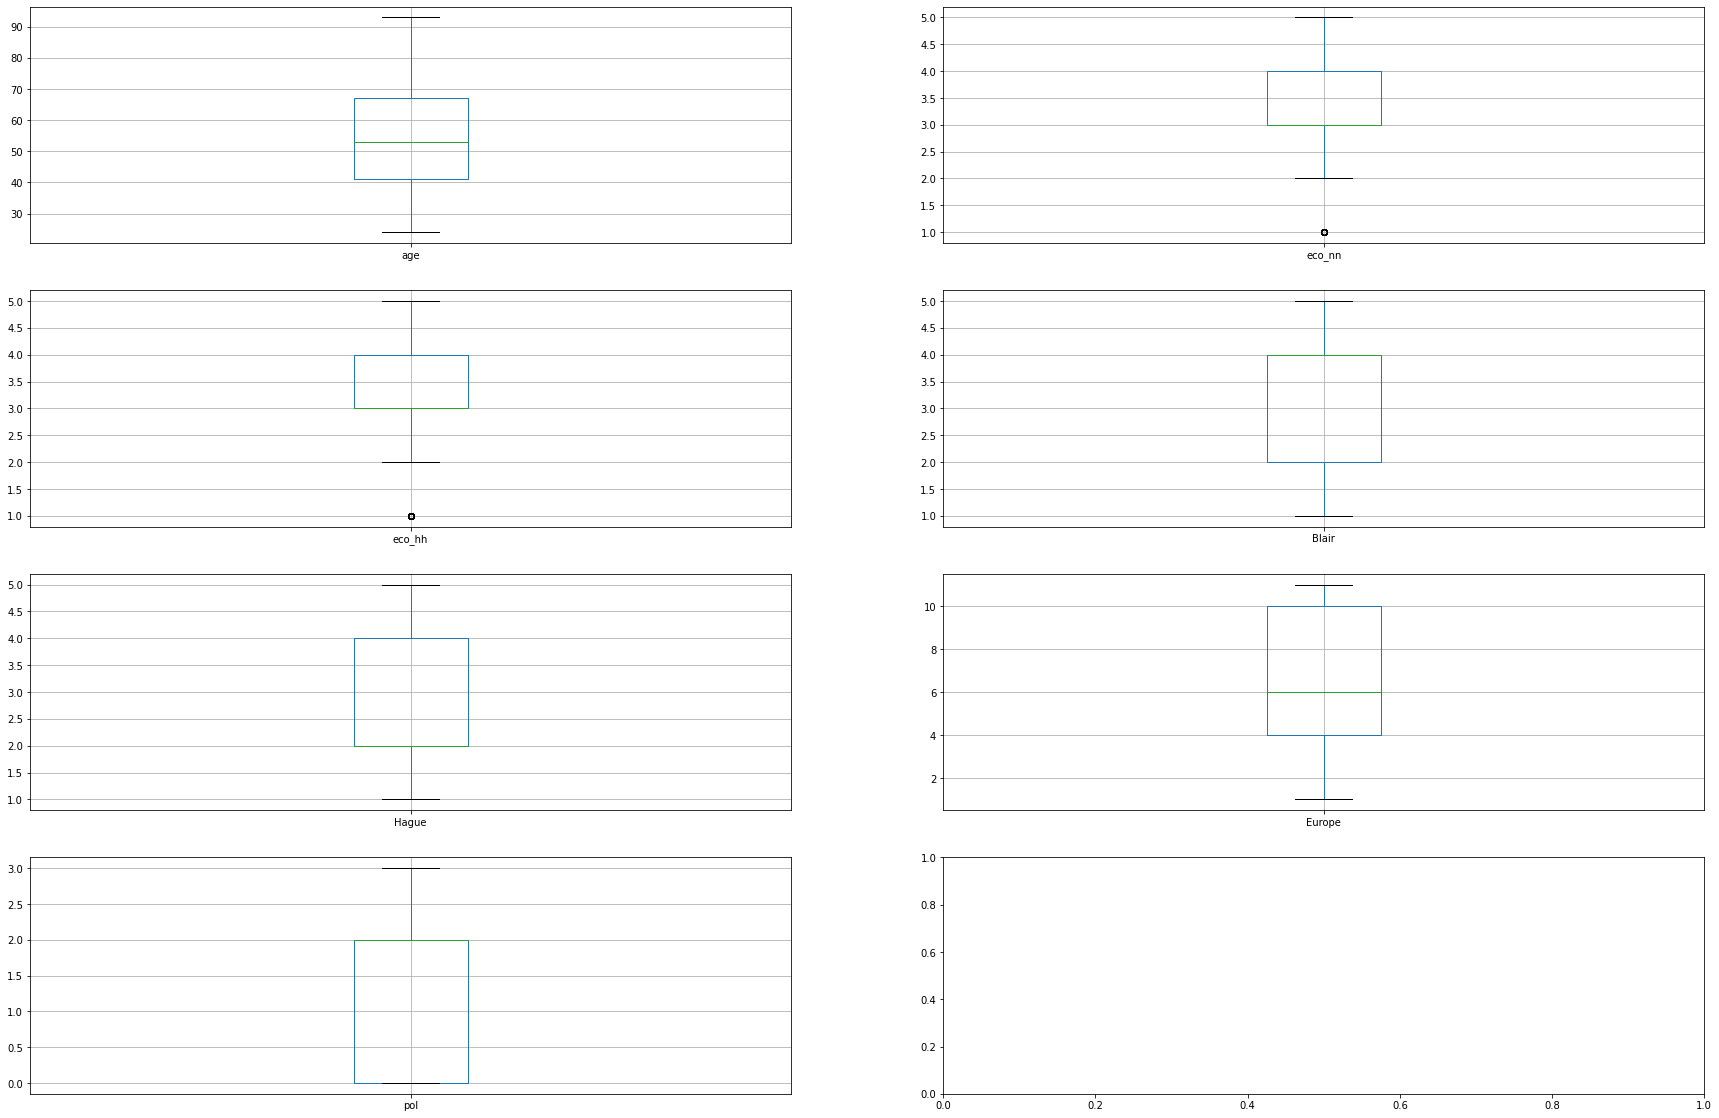

In [223]:
f,ax = plt.subplots(4,2, figsize=(30,20))

df1.boxplot('age',ax=ax[0,0],)
df1.boxplot('eco_nn',ax=ax[0,1])
df1.boxplot('eco_hh',ax=ax[1,0])
df1.boxplot('Blair',ax=ax[1,1])
df1.boxplot('Hague',ax=ax[2,0])
df1.boxplot('Europe',ax=ax[2,1])
df1.boxplot('pol',ax=ax[3,0])


plt.show()

**Percentage of outliers present in the dataset**

In [224]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Blair,0.00
Europe,0.00
Hague,0.00
age,0.00
eco_hh,4.26
eco_nn,2.43
gender,0.00
pol,0.00
vote,0.00


There are outliers in **eco_hh** and **eco_nn** the variables. Ensemble techniques can handle the outliers. 


**Check for Correlation**


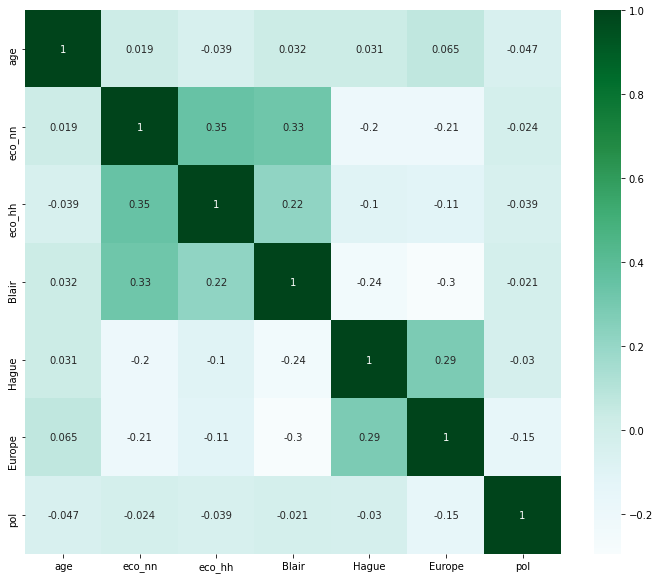

In [225]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), cmap='BuGn', annot=True)
plt.show()

## Univariate Analysis



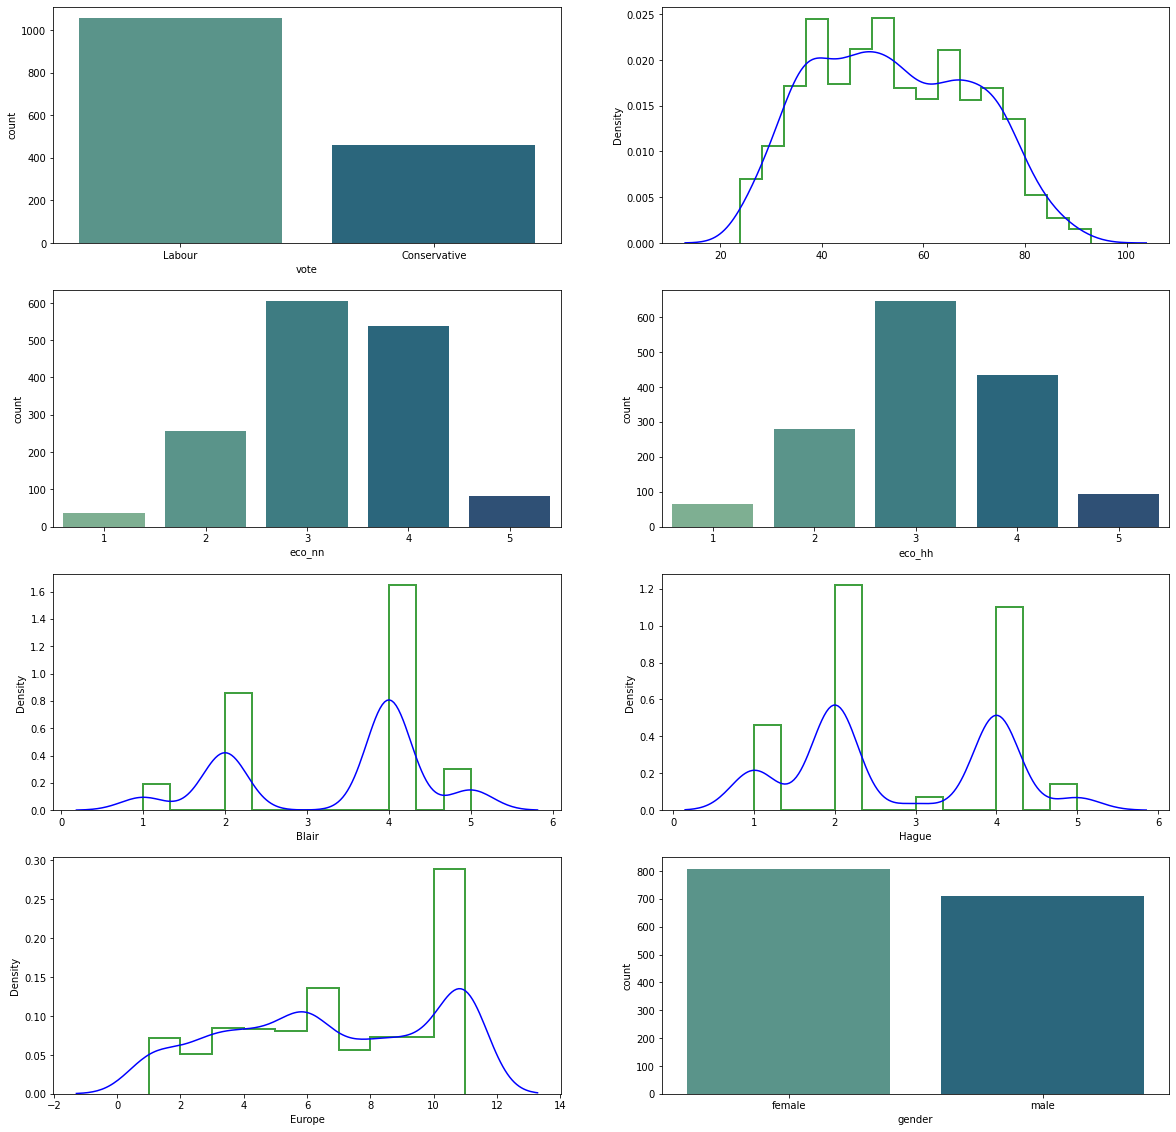

In [226]:
f,ax = plt.subplots(4,2, figsize=(20,20))
sns.countplot(df1.vote,ax=ax[0,0], palette='crest')
sns.distplot(x=df1.age, ax=ax[0,1],color='b', hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 0.75, "color": "g"})
sns.countplot(df1.eco_nn,ax=ax[1,0],palette='crest')
sns.countplot(df1.eco_hh,ax=ax[1,1],palette='crest')
sns.distplot(df1.Blair,ax=ax[2,0],color='b', hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 0.75, "color": "g"})
sns.distplot(df1.Hague,ax=ax[2,1],color='b', hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 0.75, "color": "g"})
sns.distplot(df1.Europe,ax=ax[3,0],color='b',hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 0.75, "color": "g"})
sns.countplot(df1.gender,ax=ax[3,1],palette='crest')

plt.show()

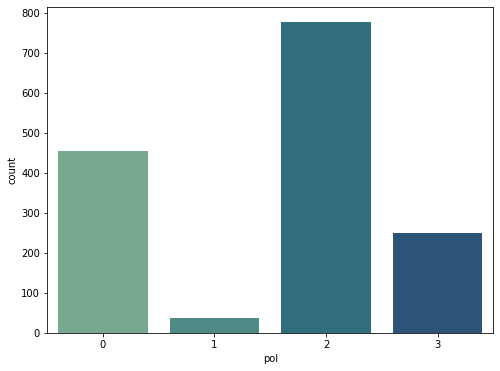

In [227]:
from pylab import rcParams
rcParams['figure.figsize']=8,6
sns.countplot(df1.pol, palette='crest')
plt.show()

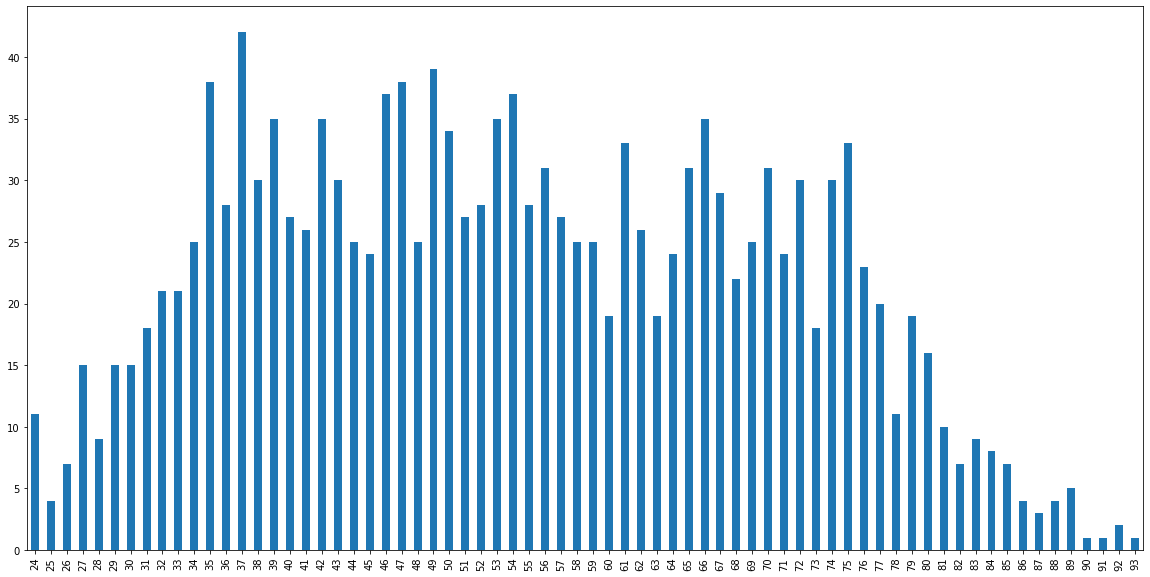

In [228]:
rcParams['figure.figsize']=20,10
df1.age.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.show()

## Bivariate Analysis

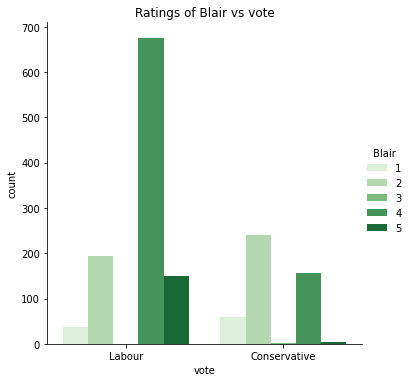

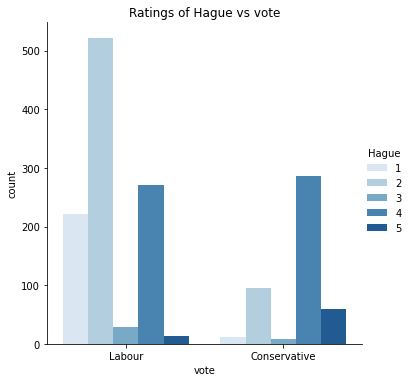

In [229]:
fig, ax = plt.subplots(1,2)


sns.catplot("vote", hue="Blair", data=df1, kind="count", palette="Greens")

plt.title("Ratings of Blair vs vote");
plt.close(1) # catplot creates an extra figure we don't need

sns.catplot("vote", hue="Hague", data=df1, kind="count", palette="Blues")
plt.title("Ratings of Hague vs vote");
plt.close(1) # catplot creates an extra figure we don't need

#ax.legend(title="xx")
#ax.set_xticklabels(["Labour", "Conservative"])
#ax.set_xlabel("")

#fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

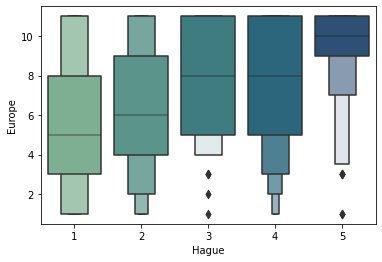

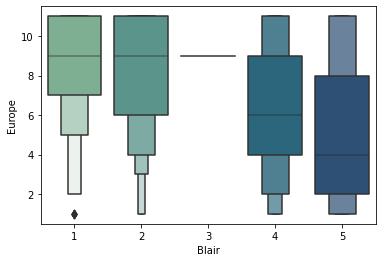

In [230]:
rcParams['figure.figsize']=6,4
sns.boxenplot(x=df1['Hague'], y = df1['Europe'], palette="crest")
plt.show()

sns.boxenplot(x=df1['Blair'], y = df1['Europe'], palette="crest")
plt.show()

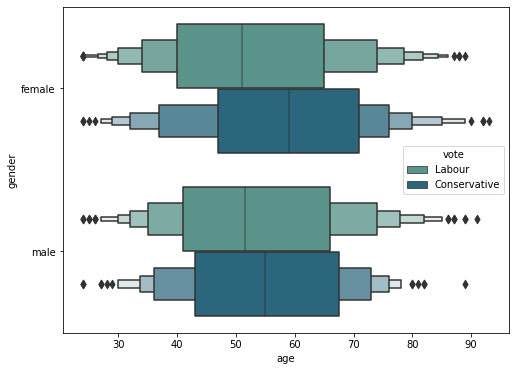

In [231]:
rcParams['figure.figsize']=8,6
ax = sns.boxenplot(x="age", y="gender", hue="vote",
                   data=df1, palette="crest")

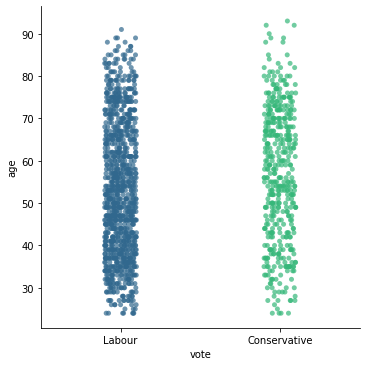

In [232]:
rcParams['figure.figsize']=20,10
sns.catplot(x="vote", y="age", data=df1, palette="viridis", alpha = 0.7)
plt.show()

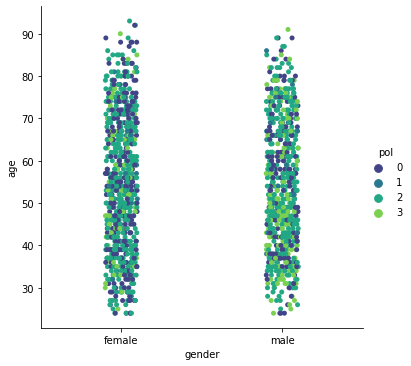

In [233]:
rcParams['figure.figsize']=30,10
sns.catplot(x="gender", y="age", hue= 'pol', data=df1, palette="viridis")
plt.show()

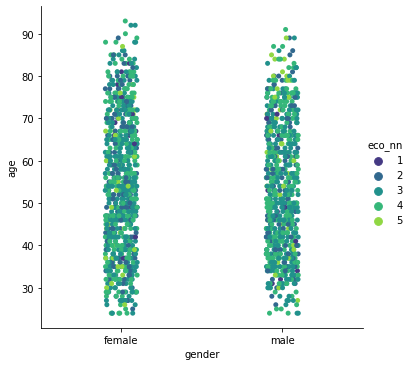

In [234]:
rcParams['figure.figsize']=30,15
sns.catplot(x="gender", y="age", hue= 'eco_nn', data=df1, palette="viridis") #, alpha = 0.75)
plt.show()

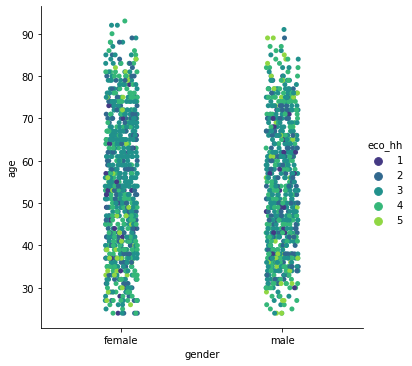

In [235]:
rcParams['figure.figsize']=40,10
sns.catplot(x="gender", y="age", hue= 'eco_hh', data=df1, palette="viridis")
plt.show()

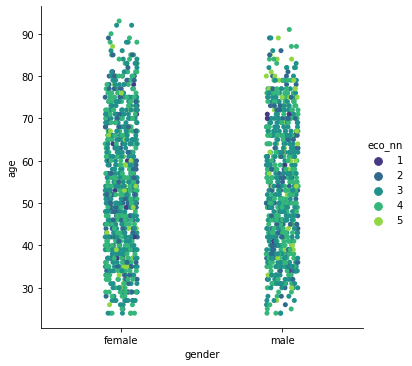

In [236]:
rcParams['figure.figsize']=20,10
sns.catplot(x="gender", y="age", hue= 'eco_nn', data=df1, palette="viridis")
plt.show()

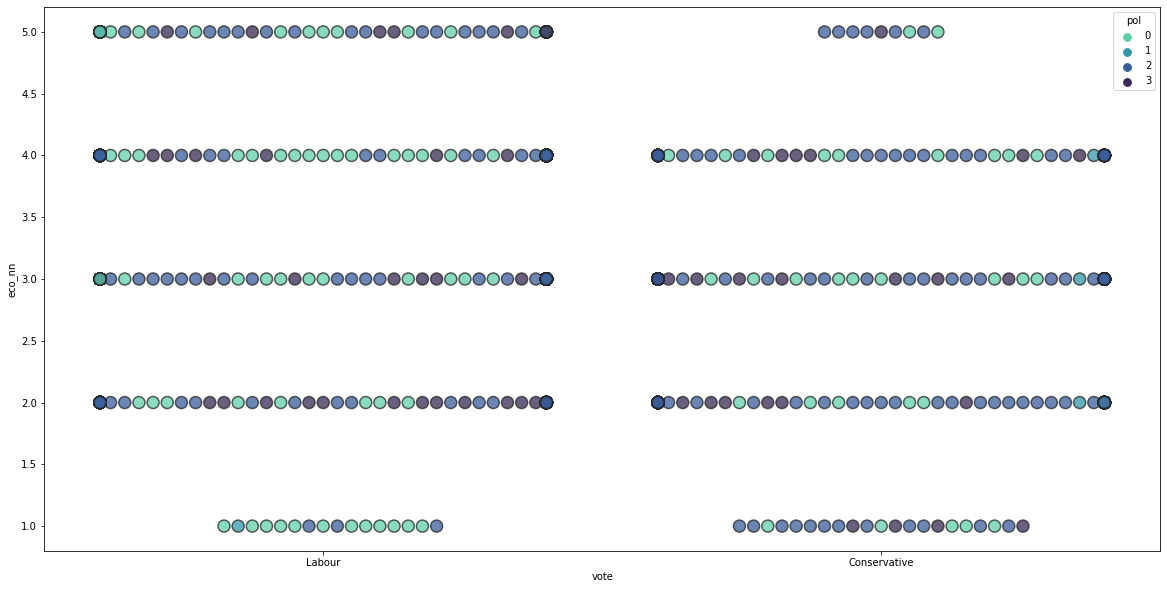

In [237]:
sns.swarmplot(y=df1.eco_nn, x=df1.vote, hue=df1.pol, size = 12, linewidth=1.5, palette='mako_r', alpha =0.75)

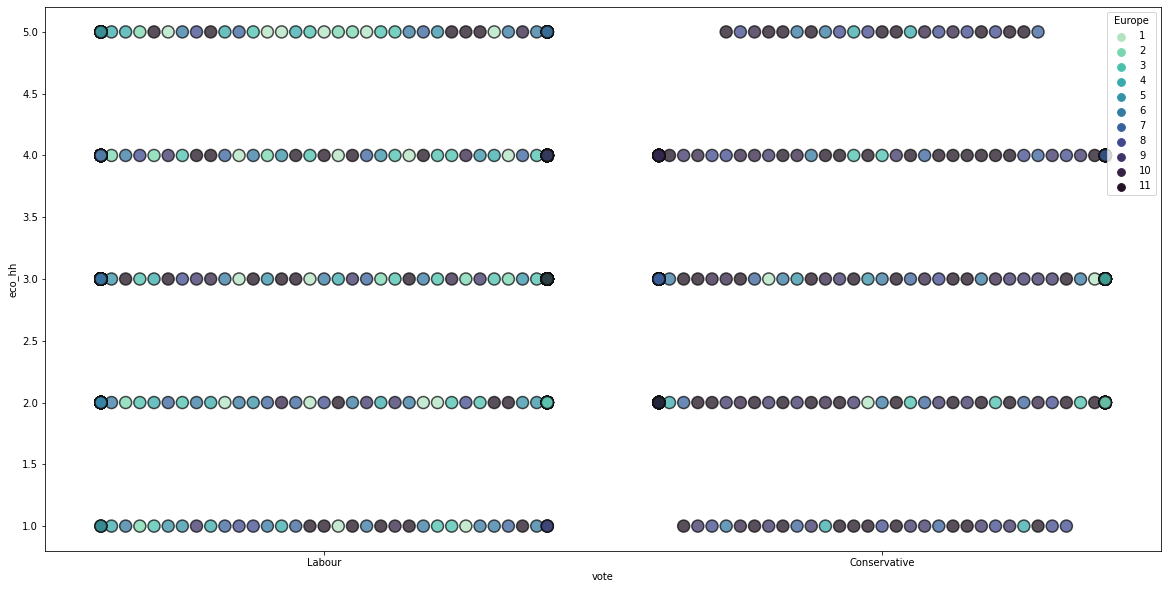

In [238]:
sns.swarmplot(y=df1.eco_hh, x=df1.vote, hue=df1.Europe, size = 12, linewidth=1.5, palette='mako_r', alpha =0.75)

In [239]:
df1.groupby('vote')['age','eco_nn','eco_hh','pol','Europe'].agg({'mean','max','min', 'std'})

age                           eco_nn                          \
             max       mean min        std    max      mean min       std   
vote                                                                        
Conservative  93  56.841304  24  15.618227      5  2.841304   1  0.859922   
Labour        91  53.109745  24  15.610532      5  3.421003   1  0.832378   

             eco_hh                         pol                          \
                max      mean min       std max      mean min       std   
vote                                                                      
Conservative      5  2.891304   1  0.945768   3  1.723913   0  0.961046   
Labour            5  3.245033   1  0.904291   3  1.460738   0  1.125051   

             Europe                          
                max      mean min       std  
vote                                         
Conservative     11  8.663043   1  2.585687  
Labour           11  5.903500   1  3.226042

In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1517 non-null   object
 1   age     1517 non-null   int64 
 2   eco_nn  1517 non-null   int64 
 3   eco_hh  1517 non-null   int64 
 4   Blair   1517 non-null   int64 
 5   Hague   1517 non-null   int64 
 6   Europe  1517 non-null   int64 
 7   pol     1517 non-null   int64 
 8   gender  1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 158.5+ KB


There are 
2 - Object type and
7 - int type variables
in our data set

In [241]:
df1.eco_nn.value_counts()

3    604
4    538
2    256
5     82
1     37
Name: eco_nn, dtype: int64

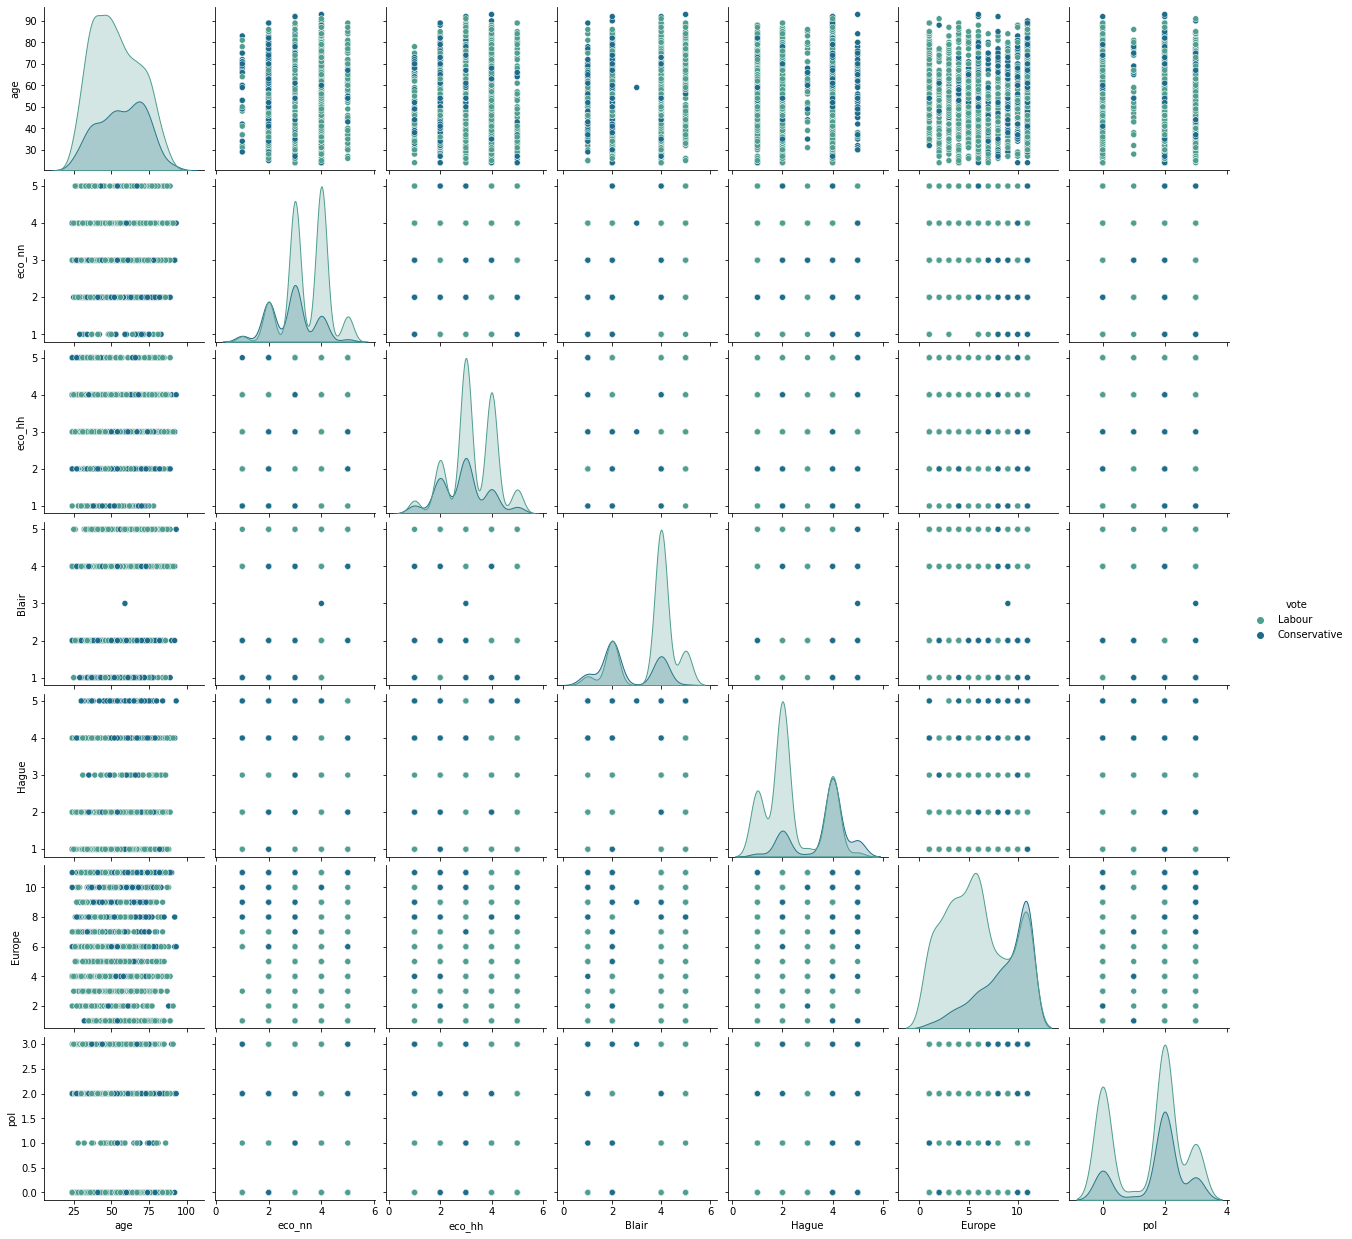

In [242]:
rcParams['figure.figsize']=(8,10)
sns.pairplot(df1, hue = 'vote', palette="crest")

Europe is the only feature that offers separation amoung the two classes of voters. Clearly, Conservatives are against the idea of being a part of EU.

# **1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)**

In [243]:
#!pip install scikit-learn==0.24.2 
#import sklearn 
#print(sklearn.__version__) 

## Extract the target column into separate vectors for training set and test set

**Encoding the Non Numeric Variables into numeric**

In [244]:
X= pd.get_dummies(df1.drop("vote",axis=1),drop_first=True)
print(X.shape)

(1517, 8)


In [245]:
X.head()

,age,eco_nn,eco_hh,Blair,Hague,Europe,pol,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


**Proportion of Labour Party and Conservative Party**

In [246]:
y = df1['vote']
y.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

**Encoding the Target Variables**

In [247]:
y.replace('Conservative',0,inplace=True)
y.replace('Labour',1,inplace=True)

**Proportion of 0 & 1**

In [248]:
y.value_counts()

1    1057
0     460
Name: vote, dtype: int64

**Split data into training and test set**

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# **1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (3 pts). Interpret the inferences of both model** 

## Logistic Regression

In [250]:
import statsmodels.api as sm

In [251]:
X_train_lr=X_train.copy()
y_train_lr=y_train.copy()

In [252]:
#y_train_lr.replace('Conservative',0,inplace=True)
#y_train_lr.replace('Labour',1,inplace=True)

In [253]:
X_train_lr_0=sm.add_constant(X_train_lr)

In [254]:
X_train_lr_0.head()

,const,age,eco_nn,eco_hh,Blair,Hague,Europe,pol,gender_male
991,1.0,34,2,4,1,4,11,2,0
1274,1.0,40,4,3,4,4,6,0,1
649,1.0,61,4,3,4,4,7,2,0
677,1.0,47,3,3,4,2,11,0,1
538,1.0,44,5,3,4,2,8,0,1


In [255]:
model0=sm.Logit(list(y_train_lr),X_train_lr_0).fit()
model0.summary()

Optimization terminated successfully.
         Current function value: 0.373589
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1052
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:                  0.3790
Time:                        14:37:58   Log-Likelihood:                -396.38
converged:                       True   LL-Null:                       -638.26
Covariance Type:            nonrobust   LLR p-value:                 2.131e-99
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0681      0.637      3.249      0.001       0.821       3.316
age            -0.0150      0.006     -2.582      0.010      -0.026      -0.004
eco_nn          0.6376      0.118      5.391      0.000       0.406       0.869
eco_hh          0.0612      0.102      0.599      0.549      -0.139       0.261
Blair           0.6046      0.079      7.633      0.000       0.449       0.760
Hague          -0.8294      0.080    -10.392      0.000      -0.986      -0.673
Europe         -0.2118      0.030     -6.970      0.000      -0.271      -0.152
pol            -0.3252      0.086     -3.766      0.000      -0.494      -0.156
gender_male     0.1991      0.183      1.086      0.277      -0.160       0.558
===============================================================================
"""

- Variable 'eco_hh' and 'gender_male' seems insignificant

**Model after Dropping insignificant variable**

In [256]:
X_train_lr_1=X_train_lr.drop(['eco_hh','gender_male'],axis=1)
X_train_lr_1=sm.add_constant(X_train_lr_1)

In [257]:
model1=sm.Logit(list(y_train_lr),X_train_lr_1).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.374312
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1054
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:                  0.3778
Time:                        14:37:58   Log-Likelihood:                -397.15
converged:                       True   LL-Null:                       -638.26
Covariance Type:            nonrobust   LLR p-value:                5.629e-101
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2526      0.602      3.740      0.000       1.072       3.433
age           -0.0156      0.006     -2.696      0.007      -0.027      -0.004
eco_nn         0.6606      0.113      5.833      0.000       0.439       0.883
Blair          0.6125      0.079      7.787      0.000       0.458       0.767
Hague         -0.8265      0.080    -10.385      0.000      -0.983      -0.671
Europe        -0.2121      0.030     -6.990      0.000      -0.272      -0.153
pol           -0.3137      0.086     -3.665      0.000      -0.481      -0.146
==============================================================================
"""

In [258]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [259]:
X_train.head()

,age,eco_nn,eco_hh,Blair,Hague,Europe,pol,gender_male
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [260]:
X_train_lr_2=X_train.drop(['eco_hh','gender_male'],axis=1)
X_test_lr_2=X_test.drop(['eco_hh','gender_male'],axis=1)
lr_model=lr.fit(X_train_lr_2,y_train)
print(lr_model.score(X_train_lr_2,y_train))

0.8341187558906692


In [261]:
lr_train_pred=lr_model.predict(X_train_lr_2)
lr_train_pred_prob=lr_model.predict_proba(X_train_lr_2)

lr_test_pred=lr_model.predict(X_test_lr_2)
lr_test_pred_prob=lr_model.predict_proba(X_test_lr_2)

In [262]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score,\
classification_report,f1_score

### Logistic Regression - Confusion Matrix 

,precision,recall,f1-score,support
0,0.753,0.635,0.689,307.000
1,0.860,0.915,0.887,754.000
accuracy,0.834,0.834,0.834,0.834
macro avg,0.807,0.775,0.788,1061.000
weighted avg,0.829,0.834,0.830,1061.000


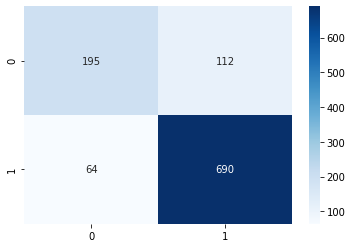

In [263]:
#Train confusion and classification
rcParams['figure.figsize']=(6,4)
sns.heatmap(confusion_matrix(y_train,lr_train_pred), annot = True, fmt='g', cmap="Blues")
lr_train_rep=classification_report(y_train,lr_train_pred,output_dict=True)

lr_train_df=round(pd.DataFrame(lr_train_rep).transpose(), 3)
lr_train_df.head()

,precision,recall,f1-score,support
0,0.762,0.712,0.736,153.000
1,0.859,0.888,0.873,303.000
accuracy,0.829,0.829,0.829,0.829
macro avg,0.811,0.800,0.805,456.000
weighted avg,0.827,0.829,0.827,456.000


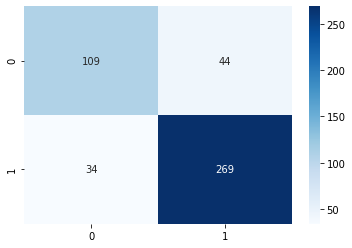

In [264]:

rcParams['figure.figsize']=(6,4)
sns.heatmap(confusion_matrix(y_test,lr_test_pred), annot = True, fmt='g', cmap="Blues")

lr_test_rep=classification_report(y_test,lr_test_pred,output_dict=True)

lr_test_df=round(pd.DataFrame(lr_test_rep).transpose(), 3)
lr_test_df.head()

In [265]:
params = model1.params
conf = model1.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

              5%        95%  Odds Ratio
const   2.921877  30.970164    9.512676
age     0.973441   0.995754    0.984534
eco_nn  1.550618   2.417113    1.935980
Blair   1.581442   2.152624    1.845061
Hague   0.374371   0.511439    0.437571
Europe  0.762189   0.858452    0.808890
pol     0.617871   0.864185    0.730722


eco_nn: With every one unit increase in eco_nn, a voter has a 93.5% more likelihood of voting for the Labour party.

Blair: With every one unit increase in rating for Mr. Blair, the voter is 84.5% more likely to vote for the Labour party.

Hague: With every one unit increase in rating for Mr. Hague, the voter is 56.3% less likely to vote for the Labour party.

Europe: With every one unit increase in Eurosceptic rating, the voter is 19.2% less likely to vote for the Labour party.

pol: With every one unit increase in rating for political party's EU agenda, the voter is 27% less likely to vote for the Labour party.

## LDA Model

In [266]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [267]:
lda=LinearDiscriminantAnalysis()

In [268]:
X_train_lda_2=X_train.drop(['eco_hh','gender_male'],axis=1)
X_test_lda_2=X_test.drop(['eco_hh','gender_male'],axis=1)
lda_model=lda.fit(X_train_lda_2,y_train)
print(lr_model.score(X_train_lda_2,y_train))

0.8341187558906692


In [269]:
lda_train_pred=lda.predict(X_train_lda_2)
lda_train_pred_prob=lda.predict_proba(X_train_lda_2)

lda_test_pred=lda.predict(X_test_lda_2)
lda_test_pred_prob=lda.predict_proba(X_test_lda_2)

### LDA - Confusion Matrix 

,precision,recall,f1-score,support
0,0.750,0.645,0.694,307.000
1,0.863,0.912,0.887,754.000
accuracy,0.835,0.835,0.835,0.835
macro avg,0.807,0.779,0.790,1061.000
weighted avg,0.830,0.835,0.831,1061.000


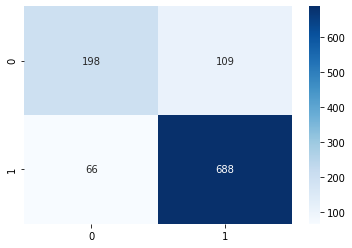

In [270]:
#Train confusion and classification
sns.heatmap(confusion_matrix(y_train,lda_train_pred), annot = True, fmt='g', cmap="Blues")

lda_train_rep=classification_report(y_train,lda_train_pred,output_dict=True)

lda_train_df=round(pd.DataFrame(lda_train_rep).transpose(), 3)
lda_train_df.head()

,precision,recall,f1-score,support
0,0.767,0.732,0.749,153.000
1,0.868,0.888,0.878,303.000
accuracy,0.836,0.836,0.836,0.836
macro avg,0.817,0.810,0.813,456.000
weighted avg,0.834,0.836,0.835,456.000


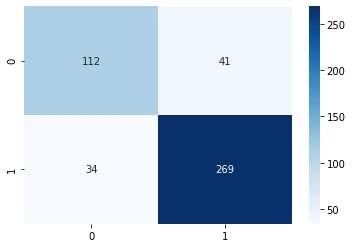

In [271]:
rcParams['figure.figsize']=(6,4)
sns.heatmap(confusion_matrix(y_test,lda_test_pred), annot = True, fmt='g', cmap="Blues")

lda_test_rep=classification_report(y_test,lda_test_pred,output_dict=True)

lda_test_df=round(pd.DataFrame(lda_test_rep).transpose(), 3)
lda_test_df.head()

# **1.5) Apply KNN Model and Naïve Bayes Model(5 pts). Interpret the inferences of each model**

## K-Nearest Neighbors 

In [272]:
#Plain KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

At p = 2, minkowski is euclidean, p=1 will be manhattan

In [273]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

y_train_pred = KNN_model.predict(X_train)
#Train accuracy
model_score = KNN_model.score(X_train,y_train)
print(model_score)
print()

0.8529688972667295



,precision,recall,f1-score,support
0,0.794,0.664,0.723,307.000
1,0.872,0.930,0.900,754.000
accuracy,0.853,0.853,0.853,0.853
macro avg,0.833,0.797,0.812,1061.000
weighted avg,0.849,0.853,0.849,1061.000


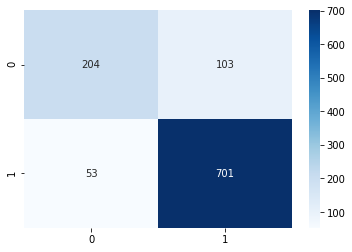

In [274]:
#Train confusion and classification

sns.heatmap(confusion_matrix(y_train,y_train_pred), annot = True, fmt='g', cmap="Blues")

KNN1=classification_report(y_train,y_train_pred,output_dict=True)


KNN1_df=round(pd.DataFrame(KNN1).transpose(), 3)
KNN1_df.head()

In [275]:
KNN1_acc = KNN1_df.iloc[2,0]
KNN1_acc

0.853

In [276]:
#predict on test data
y_test_pred = KNN_model.predict(X_test)
print(KNN_model.score(X_test, y_test))

0.8157894736842105


,precision,recall,f1-score,support
0,0.767,0.647,0.702,153.000
1,0.835,0.901,0.867,303.000
accuracy,0.816,0.816,0.816,0.816
macro avg,0.801,0.774,0.784,456.000
weighted avg,0.812,0.816,0.811,456.000


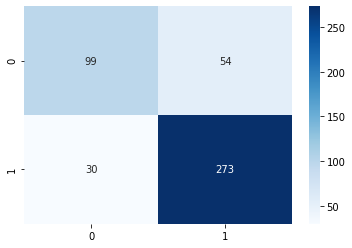

In [277]:
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot = True, fmt='g', cmap="Blues")
KNN1_1=classification_report(y_test,y_test_pred,output_dict=True)
KNN1_1_df=round(pd.DataFrame(KNN1_1).transpose(), 3)
KNN1_1_acc = KNN1_1_df.iloc[2,0]
KNN1_1_df

In [278]:
#Iteration 2: Scale the numbers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)

X_test = sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
# call and fit the model on train data
KNN_model2 = KNeighborsClassifier()
KNN_model2.fit(X_train,y_train)
y_train_pred = KNN_model2.predict(X_train)

0.7106503298774741


,precision,recall,f1-score,support
0,0.770,0.707,0.737,307.000
1,0.884,0.914,0.899,754.000
accuracy,0.854,0.854,0.854,0.854
macro avg,0.827,0.810,0.818,1061.000
weighted avg,0.851,0.854,0.852,1061.000


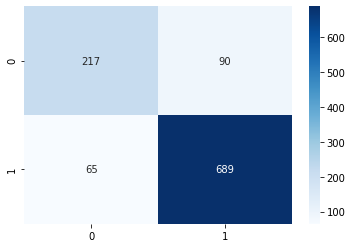

In [279]:
#Train performance
model_score = KNN_model.score(X_train,y_train)
print(model_score)
#Train confusion and classification
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot = True, fmt='g', cmap="Blues")

KNN2=classification_report(y_train,y_train_pred,output_dict=True)
KNN2_df=round(pd.DataFrame(KNN2).transpose(),3)
KNN2_acc = KNN2_df.iloc[2,0]
KNN2_df

0.8245614035087719
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.66      1.00      0.80       303

    accuracy                           0.66       456
   macro avg       0.33      0.50      0.40       456
weighted avg       0.44      0.66      0.53       456



,precision,recall,f1-score,support
0,0.000,0.000,0.000,153.000
1,0.664,1.000,0.798,303.000
accuracy,0.664,0.664,0.664,0.664
macro avg,0.332,0.500,0.399,456.000
weighted avg,0.442,0.664,0.531,456.000


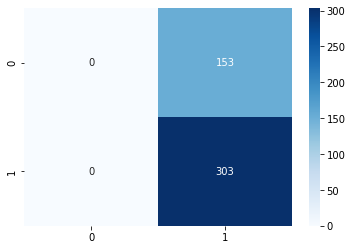

In [280]:
#Test prediction and performance
y_test_pred = KNN_model.predict(X_test)
print(KNN_model2.score(X_test, y_test))
print(classification_report(y_test,y_test_pred))

sns.heatmap(confusion_matrix(y_test,y_test_pred), annot = True, fmt='g', cmap="Blues")

KNN2_1=classification_report(y_test,y_test_pred,output_dict=True)
KNN2_1_df=round(pd.DataFrame(KNN2_1).transpose(),3)
KNN2_1_acc = KNN2_1_df.iloc[2,0]
KNN2_1_df

In [281]:
#Iteration 3: find the optimum k value
ac_scores_train = []
ac_scores_test = []

for k in range(1,20,2):
  knn3 = KNeighborsClassifier(n_neighbors = k)
  knn3.fit(X_train,y_train)
  #Evaluation of Train
  ac_train = knn3.score(X_train,y_train)
  ac_scores_train.append(ac_train)
  #Evaluation of Test
  ac_test = knn3.score(X_test,y_test)
  ac_scores_test.append(ac_test)


In [282]:
ac_scores_test

[0.7828947368421053,
 0.8092105263157895,
 0.8245614035087719,
 0.8157894736842105,
 0.8201754385964912,
 0.8333333333333334,
 0.8245614035087719,
 0.8267543859649122,
 0.8355263157894737,
 0.831140350877193]

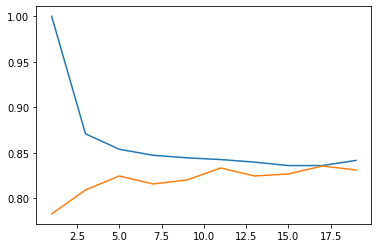

In [283]:
plt.plot(range(1,20,2), ac_scores_train)
plt.plot(range(1,20,2), ac_scores_test)

0.8397737983034873



,precision,recall,f1-score,support
0,0.734,0.700,0.717,307.00
1,0.880,0.897,0.888,754.00
accuracy,0.840,0.840,0.840,0.84
macro avg,0.807,0.798,0.802,1061.00
weighted avg,0.838,0.840,0.839,1061.00


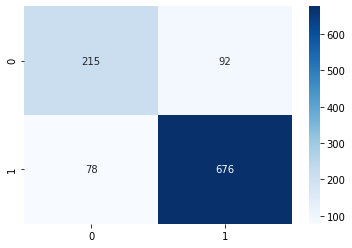

In [284]:
KNN_model3 = KNeighborsClassifier(n_neighbors=16)
KNN_model3.fit(X_train,y_train)

y_train_pred = KNN_model3.predict(X_train)
#Train accuracy
model_score = KNN_model3.score(X_train,y_train)
print(model_score)
print()

#Train confusion and classification

sns.heatmap(confusion_matrix(y_train,y_train_pred), annot = True, fmt='g', cmap="Blues")

#print(metrics.classification_report(y_train,y_train_pred))
KNN3=classification_report(y_train,y_train_pred,output_dict=True)

KNN3_df=round(pd.DataFrame(KNN3).transpose(),3)
KNN3_acc = KNN3_df.iloc[2,0]
KNN3_df

0.8421052631578947


,precision,recall,f1-score,support
0,0.796,0.712,0.752,153.000
1,0.862,0.908,0.884,303.000
accuracy,0.842,0.842,0.842,0.842
macro avg,0.829,0.810,0.818,456.000
weighted avg,0.840,0.842,0.840,456.000


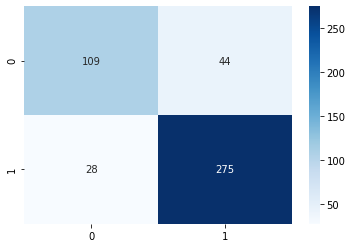

In [285]:
#predict on test data
y_train_pred = KNN_model3.predict(X_train)
y_test_pred = KNN_model3.predict(X_test)
print(KNN_model3.score(X_test, y_test))

#print(metrics.classification_report(y_test,y_test_pred))
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot = True, fmt='g', cmap="Blues")

KNN3_1=classification_report(y_test,y_test_pred,output_dict=True)

KNN3_1_df=round(pd.DataFrame(KNN3_1).transpose(),3)
KNN3_1_acc = KNN3_1_df.iloc[2,0]
KNN3_1_df


**Based on the above 3 KNN models, it seems all the model are performing fairly good. However, if the business has to choose anyone one model we would recommend to use KNN3 model which is performing fairly well for both the parties i.e.; 'Labour' & 'Conservative'** 

In [286]:
# Iteration 4: Gridsearch
params = {'algorithm': ['auto','brute','kd_tree','ball_tree'],
          'n_neighbors':[5,9,13,15,16,17],
          'leaf_size':[25,30,35,40],
          'p':[1,2,3,4,5]}

In [287]:
from sklearn.model_selection import GridSearchCV
KNN_model_GSCV = KNeighborsClassifier()
grid_knn = GridSearchCV(KNN_model_GSCV, param_grid = params, refit = True, cv=3)


In [288]:
#print(grid_knn.best_params_)
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'brute', 'kd_tree', 'ball_tree'],
                         'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [5, 9, 13, 15, 16, 17],
                         'p': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

0.8416588124410933


,precision,recall,f1-score,support
0,0.742,0.694,0.717,307.000
1,0.879,0.902,0.890,754.000
accuracy,0.842,0.842,0.842,0.842
macro avg,0.810,0.798,0.804,1061.000
weighted avg,0.839,0.842,0.840,1061.000


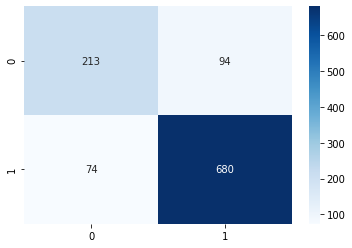

In [289]:
print(grid_knn.score(X_train,y_train))
sns.heatmap(confusion_matrix(y_train,grid_knn.predict(X_train)), annot = True, fmt='g', cmap="Blues")
KNNGCV=classification_report(y_train,grid_knn.predict(X_train),output_dict=True)
KNNGCV_df=round(pd.DataFrame(KNNGCV).transpose(),3)
KNNGCV_df_acc = KNNGCV_df.iloc[2,0]

KNNGCV_df

,precision,recall,f1-score,support
0,0.773,0.712,0.741,153.000
1,0.860,0.894,0.877,303.000
accuracy,0.833,0.833,0.833,0.833
macro avg,0.817,0.803,0.809,456.000
weighted avg,0.831,0.833,0.832,456.000


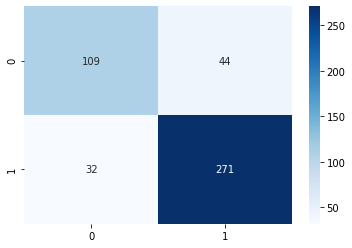

In [290]:
#print(classification_report(y_test,grid_knn.predict(X_test)))

sns.heatmap(confusion_matrix(y_test, grid_knn.predict(X_test)), annot = True, fmt='g', cmap="Blues")

KNNGCV=classification_report(y_test,grid_knn.predict(X_test),output_dict=True)
KNNGCV1_df=round(pd.DataFrame(KNNGCV).transpose(), 3)
KNNGCV1_df_acc = KNNGCV1_df.iloc[2,0]
KNNGCV1_df

Gridsearch CV didnt show any improvement, because the best params came out to be the same as the previous iteration. So, still we would recommend KKN3 model to the business.

In [291]:
df.vote.value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

## Naive Bayes

In [348]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [349]:
NB_model = GaussianNB()
NB2_model = BernoulliNB()
NB3_model = MultinomialNB()

0.8350612629594723
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



,precision,recall,f1-score,support
0,0.728,0.687,0.707,307.000
1,0.875,0.895,0.885,754.000
accuracy,0.835,0.835,0.835,0.835
macro avg,0.802,0.791,0.796,1061.000
weighted avg,0.833,0.835,0.834,1061.000


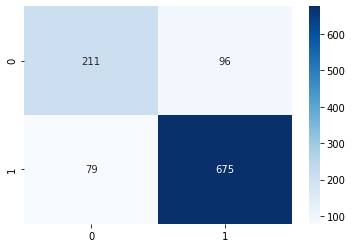

In [297]:
# Train for Gaussian Model

NB_model.fit(X_train, y_train)
print(NB_model.score(X_train, y_train))
NB_ypred=NB_model.predict(X_train)
print(classification_report(y_train,NB_ypred))
NB_df=classification_report(y_train,NB_ypred,output_dict=True)
sns.heatmap(confusion_matrix(y_train,NB_ypred), annot = True, fmt='g', cmap="Blues")

NB_df=round(pd.DataFrame(NB_df).transpose(), 3)
NB_df.head()

In [298]:
NB_df_acc = NB_df.iloc[2,0]
NB_df_acc

0.835

,precision,recall,f1-score,support
0,0.737,0.732,0.734,153.000
1,0.865,0.868,0.867,303.000
accuracy,0.822,0.822,0.822,0.822
macro avg,0.801,0.800,0.800,456.000
weighted avg,0.822,0.822,0.822,456.000


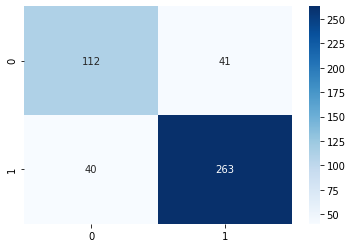

In [299]:
# Test for Gaussian Model
NB_ypred_1=NB_model.predict(X_test)
#print(classification_report(y_test,NB_ypred_1))
NB_df_1=classification_report(y_test,NB_ypred_1,output_dict=True)
sns.heatmap(confusion_matrix(y_test,NB_ypred_1), annot = True, fmt='g', cmap="Blues")
NB_df_1=round(pd.DataFrame(NB_df_1).transpose(), 3)
NB_df_1.head()


In [300]:
NB_df_1_acc = NB_df_1.iloc[2,0]
NB_df_1_acc

0.822

0.8303487276154571


,precision,recall,f1-score,support
0,0.710,0.700,0.705,307.00
1,0.879,0.883,0.881,754.00
accuracy,0.830,0.830,0.830,0.83
macro avg,0.794,0.792,0.793,1061.00
weighted avg,0.830,0.830,0.830,1061.00


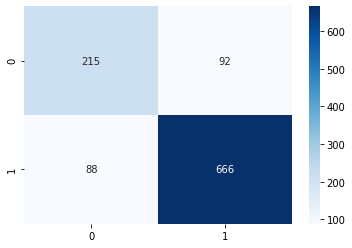

In [301]:
# Train for Bernoulli Model
NB2_model.fit(X_train, y_train)
print(NB2_model.score(X_train, y_train))
NB2_ypred=NB2_model.predict(X_train)
#print(classification_report(y_train,NB2_ypred))
sns.heatmap(confusion_matrix(y_train,NB2_ypred), annot = True, fmt='g', cmap="Blues")

NB2_df=round(pd.DataFrame(classification_report(y_train,NB2_ypred,output_dict=True)).transpose(), 3)
NB2_df.head()

In [302]:
NB2_df_acc = NB2_df.iloc[2,0]
NB2_df_acc

0.83

,precision,recall,f1-score,support
0,0.704,0.699,0.702,153.0
1,0.849,0.851,0.850,303.0
accuracy,0.800,0.800,0.800,0.8
macro avg,0.776,0.775,0.776,456.0
weighted avg,0.800,0.800,0.800,456.0


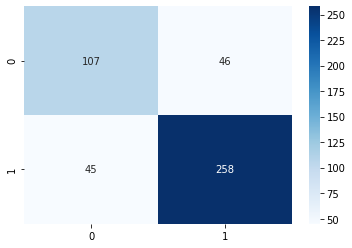

In [303]:
# Test for Bernoulli Model
NB2_ypred_1=NB2_model.predict(X_test)
NB2_df_1 = classification_report(y_test, NB2_ypred_1, output_dict=True)
sns.heatmap(confusion_matrix(y_test, NB2_ypred_1), annot = True, fmt='g', cmap="Blues")
NB2_df_1 = round(pd.DataFrame(NB2_df_1).transpose(), 3)
NB2_df_1.head()


In [353]:
NB2_df_1_acc = NB2_df_1.iloc[2,0]
NB2_df_1_acc

0.8

0.8171536286522149


,precision,recall,f1-score,support
0,0.733,0.580,0.647,307.000
1,0.842,0.914,0.877,754.000
accuracy,0.817,0.817,0.817,0.817
macro avg,0.787,0.747,0.762,1061.000
weighted avg,0.811,0.817,0.810,1061.000


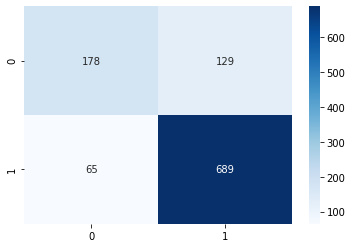

In [350]:
# Train for Multinomial Model
NB3_model.fit(X_train, y_train)
print(NB3_model.score(X_train, y_train))
NB3_ypred=NB3_model.predict(X_train)
#print(classification_report(y_train,NB2_ypred))
sns.heatmap(confusion_matrix(y_train,NB3_ypred), annot = True, fmt='g', cmap="Blues")

NB3_df=round(pd.DataFrame(classification_report(y_train,NB3_ypred,output_dict=True)).transpose(), 3)
NB3_df.head()

,precision,recall,f1-score,support
0,0.731,0.621,0.671,153.000
1,0.822,0.884,0.852,303.000
accuracy,0.796,0.796,0.796,0.796
macro avg,0.776,0.753,0.762,456.000
weighted avg,0.791,0.796,0.791,456.000


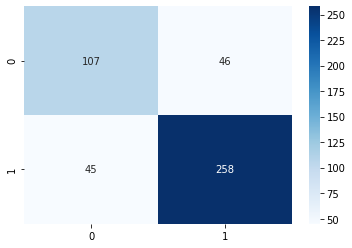

In [354]:
# Test for Multinomial Model
NB3_ypred_1=NB3_model.predict(X_test)
NB3_df_1 = classification_report(y_test, NB3_ypred_1, output_dict=True)
sns.heatmap(confusion_matrix(y_test, NB2_ypred_1), annot = True, fmt='g', cmap="Blues")
NB3_df_1 = round(pd.DataFrame(NB3_df_1).transpose(), 3)
NB3_df_1.head()


### We can see from the above two explanation thaat Gaussian Model is working better than the Bernoulli Model as the difference in Train & Test accuracy is less in Gaussian Model

# **1.6) Model Tuning (3 pts) , Bagging ( 3 pts) and Boosting**

## **Boosting**

### **Adaboost Classifier**

0.8501413760603205


,precision,recall,f1-score,support
0,0.764,0.697,0.729,307.00
1,0.881,0.912,0.896,754.00
accuracy,0.850,0.850,0.850,0.85
macro avg,0.823,0.805,0.813,1061.00
weighted avg,0.847,0.850,0.848,1061.00


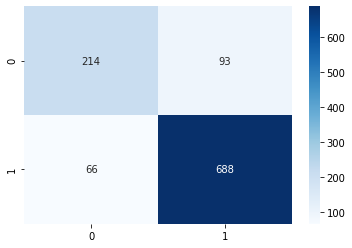

In [305]:
# Training the Adaboost Model
from sklearn.ensemble import AdaBoostClassifier
ADB_Model = AdaBoostClassifier(n_estimators=100, random_state=1)
ADB_Model.fit(X_train,y_train)
ADB_Model.predict(X_train)
print(ADB_Model.score(X_train, y_train))
ADB_df = round(pd.DataFrame(classification_report(y_train, ADB_Model.predict(X_train), output_dict=True)).transpose(),3)
sns.heatmap(confusion_matrix(y_train, ADB_Model.predict(X_train)), annot = True, fmt='g', cmap="Blues")
ADB_df.head()

In [306]:
ADB_df_acc = ADB_df.iloc[2,0]
ADB_df_acc

0.85

,precision,recall,f1-score,support
0,0.746,0.673,0.708,153.000
1,0.843,0.884,0.863,303.000
accuracy,0.814,0.814,0.814,0.814
macro avg,0.795,0.779,0.786,456.000
weighted avg,0.810,0.814,0.811,456.000


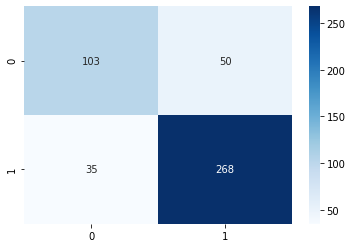

In [307]:
# Testing the Adaboost Model
ADB_pred = ADB_Model.predict(X_test)
#print(ADB_Model.score(X_test,y_test))
ADB_df_1 = round(pd.DataFrame(classification_report(y_test, ADB_Model.predict(X_test), output_dict=True)).transpose(),3)
sns.heatmap(confusion_matrix(y_test, ADB_Model.predict(X_test)), annot = True, fmt='g', cmap="Blues")
ADB_df_1.head()


In [308]:
ADB_df_1_acc = ADB_df_1.iloc[2,0]
ADB_df_1_acc

0.814

### **Gradient Boost Classifier**

,precision,recall,f1-score,support
0,0.839,0.779,0.807,307.000
1,0.912,0.939,0.925,754.000
accuracy,0.893,0.893,0.893,0.893
macro avg,0.875,0.859,0.866,1061.000
weighted avg,0.891,0.893,0.891,1061.000


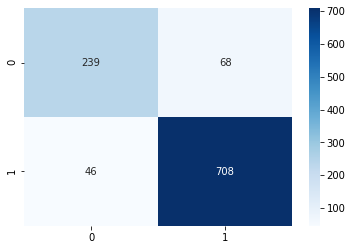

In [309]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
# Training the Gradient Boost Model
gbcl.fit(X_train, y_train)
GB_ytrain_pred = gbcl.predict(X_train)
#print(gbcl.score(X_train, y_train))
GB_df= classification_report(y_train, GB_ytrain_pred, output_dict=True)
sns.heatmap(confusion_matrix(y_train, GB_ytrain_pred), annot = True, fmt='g', cmap="Blues")

GB_df=round(pd.DataFrame(GB_df).transpose(),3)
GB_df.head()

In [310]:
# Train Accuracy Gradient Boosting
GB_df_acc = GB_df.iloc[2,0]
GB_df_acc

0.893

,precision,recall,f1-score,support
0,0.794,0.680,0.732,153.000
1,0.849,0.911,0.879,303.000
accuracy,0.833,0.833,0.833,0.833
macro avg,0.822,0.795,0.806,456.000
weighted avg,0.831,0.833,0.830,456.000


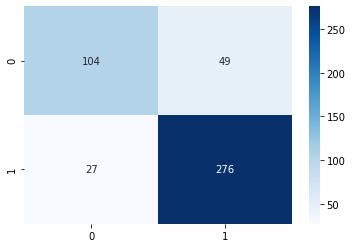

In [311]:
# Testing the Gradiant Boosting Model
GB_ytest_pred = gbcl.predict(X_test)
GB_df_1 = round(pd.DataFrame(classification_report(y_test, GB_ytest_pred, output_dict=True)).transpose(),3)
sns.heatmap(confusion_matrix(y_test, GB_ytest_pred), annot = True, fmt='g', cmap="Blues")
GB_df_1.head()


In [312]:
# Test Accuracy Gradient Boosting
GBTest_acc = GB_df_1.iloc[2,0]
GBTest_acc

0.833

## **Bagging**

### Random Forest

In [313]:
from sklearn.ensemble import RandomForestClassifier
import time
rf_model=RandomForestClassifier(n_estimators=1000,random_state=1)

X_train_rf_2=X_train.drop(['eco_hh','gender_male'],axis=1)
X_test_rf_2=X_test.drop(['eco_hh','gender_male'],axis=1)


rf_model.fit(X_train_rf_2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [314]:
rf_train_pred=rf_model.predict(X_train_rf_2)
rf_train_pred_prob=rf_model.predict_proba(X_train_rf_2)

rf_test_pred=rf_model.predict(X_test_rf_2)
rf_test_pred_prob=rf_model.predict_proba(X_test_rf_2)

[[303   4]
 [  1 753]]


,precision,recall,f1-score,support
0,0.997,0.987,0.992,307.000
1,0.995,0.999,0.997,754.000
accuracy,0.995,0.995,0.995,0.995
macro avg,0.996,0.993,0.994,1061.000
weighted avg,0.995,0.995,0.995,1061.000


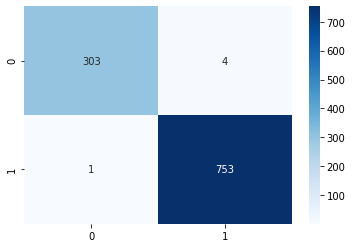

In [315]:
#Train confusion and classification
print(confusion_matrix(y_train,rf_train_pred))
rf_train_rep=classification_report(y_train,rf_train_pred,output_dict=True)
sns.heatmap(confusion_matrix(y_train,rf_train_pred), annot = True, fmt='g', cmap="Blues")
rf_train_df=round(pd.DataFrame(rf_train_rep).transpose(), 3)
rf_train_df.head()

,precision,recall,f1-score,support
0,0.745,0.667,0.703,153.000
1,0.840,0.884,0.862,303.000
accuracy,0.811,0.811,0.811,0.811
macro avg,0.792,0.776,0.783,456.000
weighted avg,0.808,0.811,0.809,456.000


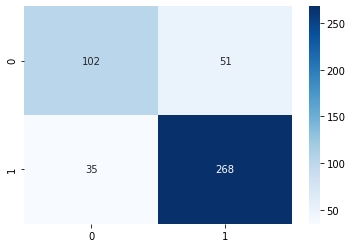

In [316]:
sns.heatmap(confusion_matrix(y_test,rf_test_pred), annot = True, fmt='g', cmap="Blues")

rf_test_rep=classification_report(y_test,rf_test_pred,output_dict=True)

rf_test_df=round(pd.DataFrame(rf_test_rep).transpose(), 3)
rf_test_df.head()

### Regularize the RF Model Through Grid Search

In [317]:
#grid_parameters = [{'n_estimators':[250, 500, 1000],
#                    'min_samples_split':[5,10,15,20],
#                   'min_samples_leaf':[10, 15, 20,25,30],
#                   'max_depth':[5,10,15]}]

In [318]:
grid_parameters = [{'n_estimators':[250, 500],
                    'min_samples_split':[5,10,15,20],
                   'min_samples_leaf':[10, 15, 20,25,30],
                   'max_depth':[5,10]}]

In [319]:
rf_model_grid_reg = RandomForestClassifier()
grid =GridSearchCV(estimator=rf_model_grid_reg, param_grid=grid_parameters, cv=5)
start_time = time.time()
rf_grid = grid.fit(X_train_rf_2, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 252.565434217453 seconds ---


In [320]:
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 250}

In [321]:
rf_model_reg = RandomForestClassifier(n_estimators=500,
                                   min_samples_leaf=10,
                                   min_samples_split=10,
                                   max_depth=10,random_state=1)
rf_model_reg.fit(X_train_rf_2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [322]:
#Predict train and Test data
rf_train_pred_reg = rf_model_reg.predict(X_train_rf_2)
rf_test_pred_reg = rf_model_reg.predict(X_test_rf_2)

,precision,recall,f1-score,support
0,0.799,0.674,0.731,307.000
1,0.875,0.931,0.902,754.000
accuracy,0.857,0.857,0.857,0.857
macro avg,0.837,0.803,0.817,1061.000
weighted avg,0.853,0.857,0.853,1061.000


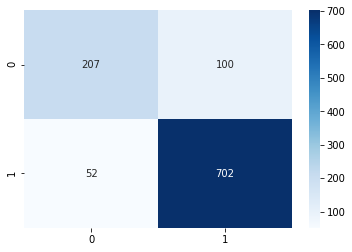

In [323]:
#Train confusion and classification
sns.heatmap(confusion_matrix(y_train,rf_train_pred_reg), annot = True, fmt='g', cmap="Blues")

rf_train_reg_rep=classification_report(y_train,rf_train_pred_reg,output_dict=True)

rf_train_reg_df=round(pd.DataFrame(rf_train_reg_rep).transpose(), 3)
rf_train_reg_df.head()



,precision,recall,f1-score,support
0,0.778,0.641,0.703,153.000
1,0.833,0.908,0.869,303.000
accuracy,0.818,0.818,0.818,0.818
macro avg,0.806,0.774,0.786,456.000
weighted avg,0.815,0.818,0.813,456.000


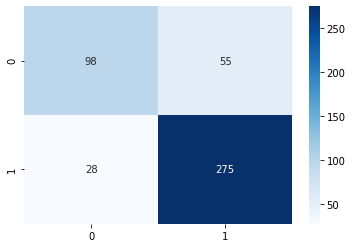

In [324]:

sns.heatmap(confusion_matrix(y_test,rf_test_pred_reg), annot = True, fmt='g', cmap="Blues")
rf_test_reg_rep=classification_report(y_test,rf_test_pred_reg,output_dict=True)

rf_test_reg_df=round(pd.DataFrame(rf_test_reg_rep).transpose(), 3)
rf_test_reg_df.head()

# **1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized**

## **Comparison of Models**

In [325]:
#KNN1
KNN1_train_model0_precision=round(KNN1_df["precision"][0],2)
KNN1_train_model0_recall=round(KNN1_df["recall"][0],2)
KNN1_train_model0_f1=round(KNN1_df["f1-score"][0],2)
KNN1_train_model0_acc=round(KNN1_df["f1-score"][2],2)

KNN1_test_model0_precision=round(KNN1_1_df["precision"][0],2)
KNN1_test_model0_recall=round(KNN1_1_df["recall"][0],2)
KNN1_test_model0_f1=round(KNN1_1_df["f1-score"][0],2)
KNN1_test_model0_acc=round(KNN1_1_df["f1-score"][2],2)


#KNN2
KNN2_train_model0_precision=round(KNN2_df["precision"][0],2)
KNN2_train_model0_recall=round(KNN2_df["recall"][0],2)
KNN2_train_model0_f1=round(KNN2_df["f1-score"][0],2)
KNN2_train_model0_acc=round(KNN2_df["f1-score"][2],2)

KNN2_test_model0_precision=round(KNN2_1_df["precision"][0],2)
KNN2_test_model0_recall=round(KNN2_1_df["recall"][0],2)
KNN2_test_model0_f1=round(KNN2_1_df["f1-score"][0],2)
KNN2_test_model0_acc=round(KNN2_1_df["f1-score"][2],2)


#KNN3
KNN3_train_model0_precision=round(KNN3_df["precision"][0],2)
KNN3_train_model0_recall=round(KNN3_df["recall"][0],2)
KNN3_train_model0_f1=round(KNN3_df["f1-score"][0],2)
KNN3_train_model0_acc=round(KNN3_df["f1-score"][2],2)

KNN3_test_model0_precision=round(KNN3_1_df["precision"][0],2)
KNN3_test_model0_recall=round(KNN3_1_df["recall"][0],2)
KNN3_test_model0_f1=round(KNN3_1_df["f1-score"][0],2)
KNN3_test_model0_acc=round(KNN3_1_df["f1-score"][2],2)


#KNN with Grid Search
KNNGCV_train_model0_precision=round(KNNGCV_df["precision"][0],2)
KNNGCV_train_model0_recall=round(KNNGCV_df["recall"][0],2)
KNNGCV_train_model0_f1=round(KNNGCV_df["f1-score"][0],2)
KNNGCV_train_model0_acc=round(KNNGCV_df["f1-score"][2],2)

KNNGCV_test_model0_precision=round(KNNGCV1_df["precision"][0],2)
KNNGCV_test_model0_recall=round(KNNGCV1_df["recall"][0],2)
KNNGCV_test_model0_f1=round(KNNGCV1_df["f1-score"][0],2)
KNNGCV_test_model0_acc=round(KNNGCV1_df["f1-score"][2],2)


#Naive Bayes Gaussian Model
NB_train_model0_precision=round(NB_df["precision"][0],2)
NB_train_model0_recall=round(NB_df["recall"][0],2)
NB_train_model0_f1=round(NB_df["f1-score"][0],2)
NB_train_model0_acc=round(NB_df["f1-score"][2],2)

NB_test_model0_precision=round(NB_df_1["precision"][0],2)
NB_test_model0_recall=round(NB_df_1["recall"][0],2)
NB_test_model0_f1=round(NB_df_1["f1-score"][0],2)
NB_test_model0_acc=round(NB_df_1["f1-score"][2],2)

#Naive Bayes Bernouli Model
NB2_train_model0_precision=round(NB2_df["precision"][0],2)
NB2_train_model0_recall=round(NB2_df["recall"][0],2)
NB2_train_model0_f1=round(NB2_df["f1-score"][0],2)
NB2_train_model0_acc=round(NB2_df["f1-score"][2],2)
                           
NB2_test_model0_precision=round(NB2_df_1["precision"][0],2)
NB2_test_model0_recall=round(NB2_df_1["recall"][0],2)
NB2_test_model0_f1=round(NB2_df_1["f1-score"][0],2)
NB2_test_model0_acc=round(NB2_df_1["f1-score"][2],2)


#Adaptive Boosting
ADB_train_model0_precision=round(ADB_df["precision"][0],2)
ADB_train_model0_recall=round(ADB_df["recall"][0],2)
ADB_train_model0_f1=round(ADB_df["f1-score"][0],2)
ADB_train_model0_acc=round(ADB_df["f1-score"][2],2)

ADB_test_model0_precision=round(ADB_df_1["precision"][0],2)
ADB_test_model0_recall=round(ADB_df_1["recall"][0],2)
ADB_test_model0_f1=round(ADB_df_1["f1-score"][0],2)
ADB_test_model0_acc=round(ADB_df_1["f1-score"][2],2)

#Gradient Boosting
GB_train_model0_precision=round(GB_df["precision"][0],2)
GB_train_model0_recall=round(GB_df["recall"][0],2)
GB_train_model0_f1=round(GB_df["f1-score"][0],2)
GB_train_model0_acc=round(GB_df["f1-score"][2],2)

GB_test_model0_precision=round(GB_df_1["precision"][0],2)
GB_test_model0_recall=round(GB_df_1["recall"][0],2)
GB_test_model0_f1=round(GB_df_1["f1-score"][0],2)
GB_test_model0_acc=round(GB_df_1["f1-score"][2],2)

In [326]:
#LR Model
lr_train_model0_precision=round(lr_train_df["precision"][0],2)
lr_train_model0_recall=round(lr_train_df["recall"][0],2)
lr_train_model0_f1=round(lr_train_df["f1-score"][0],2)
lr_train_model0_acc=round(lr_train_df["f1-score"][2],2)

lr_test_model0_precision=round(lr_test_df["precision"][0],2)
lr_test_model0_recall=round(lr_test_df["recall"][0],2)
lr_test_model0_f1=round(lr_test_df["f1-score"][0],2)
lr_test_model0_acc=round(lr_test_df["f1-score"][2],2)


### LDA Model
lda_train_model0_precision=round(lda_train_df["precision"][0],2)
lda_train_model0_recall=round(lda_train_df["recall"][0],2)
lda_train_model0_f1=round(lda_train_df["f1-score"][0],2)
lda_train_model0_acc=round(lda_train_df["f1-score"][2],2)

lda_test_model0_precision=round(lda_test_df["precision"][0],2)
lda_test_model0_recall=round(lda_test_df["recall"][0],2)
lda_test_model0_f1=round(lda_test_df["f1-score"][0],2)
lda_test_model0_acc=round(lda_test_df["f1-score"][2],2)


### RF GS Model
rf_train_model0_precision=round(rf_train_reg_df["precision"][0],2)
rf_train_model0_recall=round(rf_train_reg_df["recall"][0],2)
rf_train_model0_f1=round(rf_train_reg_df["f1-score"][0],2)
rf_train_model0_acc=round(rf_train_reg_df["f1-score"][2],2)

rf_test_model0_precision=round(rf_test_reg_df["precision"][0],2)
rf_test_model0_recall=round(rf_test_reg_df["recall"][0],2)
rf_test_model0_f1=round(rf_test_reg_df["f1-score"][0],2)
rf_test_model0_acc=round(rf_test_reg_df["f1-score"][2],2)



In [327]:
index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame({  
            'KNN1 Train':[KNN1_train_model0_acc,KNN1_train_model0_recall,KNN1_train_model0_precision,KNN1_train_model0_f1],
            'KNN1 Test':[KNN1_test_model0_acc,KNN1_test_model0_recall,KNN1_test_model0_precision,KNN1_test_model0_f1],

            'KNN2 Train':[KNN2_train_model0_acc,KNN2_train_model0_recall,KNN2_train_model0_precision,KNN2_train_model0_f1],
            'KNN2 Test':[KNN2_test_model0_acc,KNN2_test_model0_recall,KNN2_test_model0_precision,KNN2_test_model0_f1],


            'KNN3 Train':[KNN3_train_model0_acc,KNN3_train_model0_recall,KNN3_train_model0_precision,KNN3_train_model0_f1],
            'KNN3 Test':[KNN3_test_model0_acc,KNN3_test_model0_recall,KNN3_test_model0_precision,KNN3_test_model0_f1],

            'KNNGCV Train':[KNNGCV_train_model0_acc,KNNGCV_train_model0_recall,KNNGCV_train_model0_precision,KNNGCV_train_model0_f1],
            'KNNGCV Test':[KNNGCV_test_model0_acc,KNNGCV_test_model0_recall,KNNGCV_test_model0_precision,KNNGCV_test_model0_f1],

            'NB Train':[NB_train_model0_acc,NB_train_model0_recall,NB_train_model0_precision,NB_train_model0_f1],
            'NB Test':[NB_test_model0_acc,NB_test_model0_recall,NB_test_model0_precision,NB_test_model0_f1],

            'NB2 Train':[NB2_train_model0_acc,NB2_train_model0_recall,NB2_train_model0_precision,NB2_train_model0_f1],
            'NB2 Test':[NB2_test_model0_acc,NB2_test_model0_recall,NB2_test_model0_precision,NB2_test_model0_f1],

            'ADB Train':[ADB_train_model0_acc,ADB_train_model0_recall,ADB_train_model0_precision,ADB_train_model0_f1],
            'ADB Test':[ADB_test_model0_acc,ADB_test_model0_recall,ADB_test_model0_precision,ADB_test_model0_f1],

            'GB Train':[GB_train_model0_acc,GB_train_model0_recall,GB_train_model0_precision,GB_train_model0_f1],
            'GB Test':[GB_test_model0_acc,GB_test_model0_recall,GB_test_model0_precision,GB_test_model0_f1],
    
            'LR Train':[lr_train_model0_acc,lr_train_model0_recall,lr_train_model0_precision,lr_train_model0_f1],
            'LR Test':[lr_test_model0_acc,lr_test_model0_recall,lr_test_model0_precision,lr_test_model0_f1],
            'LDA Train':[lda_train_model0_acc,lda_train_model0_recall,lda_train_model0_precision,lda_train_model0_f1],
            'LDA Test':[lda_test_model0_acc,lda_test_model0_recall,lda_test_model0_precision,lda_test_model0_f1],
            'RF GS Train':[rf_train_model0_acc,rf_train_model0_recall,rf_train_model0_precision,rf_train_model0_f1],
            'RF GS Test':[rf_test_model0_acc,rf_test_model0_recall,rf_test_model0_precision,rf_test_model0_f1]
            },index=index)
round(data,2)

,KNN1 Train,KNN1 Test,KNN2 Train,KNN2 Test,KNN3 Train,KNN3 Test,KNNGCV Train,KNNGCV Test,NB Train,NB Test,NB2 Train,NB2 Test,ADB Train,ADB Test,GB Train,GB Test,LR Train,LR Test,LDA Train,LDA Test,RF GS Train,RF GS Test
Accuracy,0.85,0.82,0.85,0.66,0.84,0.84,0.84,0.83,0.84,0.82,0.83,0.8,0.85,0.81,0.89,0.83,0.83,0.83,0.84,0.84,0.86,0.82
Recall,0.66,0.65,0.71,0.00,0.70,0.71,0.69,0.71,0.69,0.73,0.70,0.7,0.70,0.67,0.78,0.68,0.64,0.71,0.64,0.73,0.67,0.64
Precision,0.79,0.77,0.77,0.00,0.73,0.80,0.74,0.77,0.73,0.74,0.71,0.7,0.76,0.75,0.84,0.79,0.75,0.76,0.75,0.77,0.80,0.78
F1 Score,0.72,0.70,0.74,0.00,0.72,0.75,0.72,0.74,0.71,0.73,0.70,0.7,0.73,0.71,0.81,0.73,0.69,0.74,0.69,0.75,0.73,0.70


In [328]:
index=['Accuracy', 'Recall','Precision','F1_Score']
data = pd.DataFrame({  
            #'KNN1 Train':[KNN1_train_model0_acc,KNN1_train_model0_recall,KNN1_train_model0_precision,KNN1_train_model0_f1],
            'KNN1 Test':[KNN1_test_model0_acc,KNN1_test_model0_recall,KNN1_test_model0_precision,KNN1_test_model0_f1],

            #'KNN2 Train':[KNN2_train_model0_acc,KNN2_train_model0_recall,KNN2_train_model0_precision,KNN2_train_model0_f1],
            'KNN2 Test':[KNN2_test_model0_acc,KNN2_test_model0_recall,KNN2_test_model0_precision,KNN2_test_model0_f1],


            #'KNN3 Train':[KNN3_train_model0_acc,KNN3_train_model0_recall,KNN3_train_model0_precision,KNN3_train_model0_f1],
            'KNN3 Test':[KNN3_test_model0_acc,KNN3_test_model0_recall,KNN3_test_model0_precision,KNN3_test_model0_f1],

            #'KNNGCV Train':[KNNGCV_train_model0_acc,KNNGCV_train_model0_recall,KNNGCV_train_model0_precision,KNNGCV_train_model0_f1],
            'KNNGCV Test':[KNNGCV_test_model0_acc,KNNGCV_test_model0_recall,KNNGCV_test_model0_precision,KNNGCV_test_model0_f1],

            #'NB Train':[NB_train_model0_acc,NB_train_model0_recall,NB_train_model0_precision,NB_train_model0_f1],
            'NB Test':[NB_test_model0_acc,NB_test_model0_recall,NB_test_model0_precision,NB_test_model0_f1],

            #'NB2 Train':[NB2_train_model0_acc,NB2_train_model0_recall,NB2_train_model0_precision,NB2_train_model0_f1],
            'NB2 Test':[NB2_test_model0_acc,NB2_test_model0_recall,NB2_test_model0_precision,NB2_test_model0_f1],

            #'ADB Train':[ADB_train_model0_acc,ADB_train_model0_recall,ADB_train_model0_precision,ADB_train_model0_f1],
            'ADB Test':[ADB_test_model0_acc,ADB_test_model0_recall,ADB_test_model0_precision,ADB_test_model0_f1],

            #'GB Train':[GB_train_model0_acc,GB_train_model0_recall,GB_train_model0_precision,GB_train_model0_f1],
            'GB Test':[GB_test_model0_acc,GB_test_model0_recall,GB_test_model0_precision,GB_test_model0_f1],
    
            #'LR Train':[lr_train_model0_acc,lr_train_model0_recall,lr_train_model0_precision,lr_train_model0_f1],
            'LR Test':[lr_test_model0_acc,lr_test_model0_recall,lr_test_model0_precision,lr_test_model0_f1],
            #'LDA Train':[lda_train_model0_acc,lda_train_model0_recall,lda_train_model0_precision,lda_train_model0_f1],
            'LDA Test':[lda_test_model0_acc,lda_test_model0_recall,lda_test_model0_precision,lda_test_model0_f1],
            #'RF Train':[rf_train_model0_acc,rf_train_model0_recall,rf_train_model0_precision,rf_train_model0_f1],
            'RF Test':[rf_test_model0_acc,rf_test_model0_recall,rf_test_model0_precision,rf_test_model0_f1]
            },index=index)
round(data,2)

,KNN1 Test,KNN2 Test,KNN3 Test,KNNGCV Test,NB Test,NB2 Test,ADB Test,GB Test,LR Test,LDA Test,RF Test
Accuracy,0.82,0.66,0.84,0.83,0.82,0.8,0.81,0.83,0.83,0.84,0.82
Recall,0.65,0.00,0.71,0.71,0.73,0.7,0.67,0.68,0.71,0.73,0.64
Precision,0.77,0.00,0.80,0.77,0.74,0.7,0.75,0.79,0.76,0.77,0.78
F1_Score,0.70,0.00,0.75,0.74,0.73,0.7,0.71,0.73,0.74,0.75,0.70


## ROC AUC

Gradient Boosting Classifier: ROC AUC=0.898
Adaptive Boosting Classifier: ROC AUC=0.877
Naive Bayes Gaussian Classifier: ROC AUC=0.876
Naive Bayes Bernoullie Classifier: ROC AUC=0.868
KNN Classifier: ROC AUC=0.888
Logistic Regression Classifier: ROC AUC=0.883
LDA Classifier: ROC AUC=0.888
Random Forest Classifier: ROC AUC=0.883
Random Forest Regularised Classifier: ROC AUC=0.899


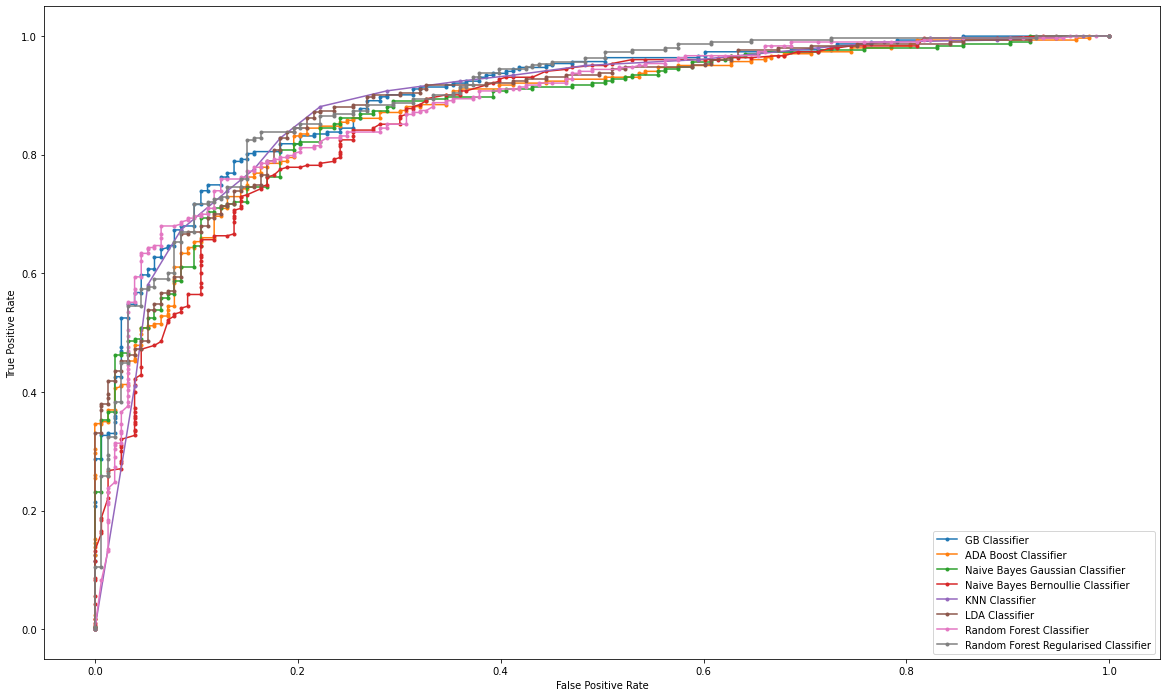

In [329]:
# If KNN_Predict_proba gives you a hard time. THen Run only the KNN3 model and then run this ROC AUC command
plt.figure(figsize=(20,12))

# Gradient boosting classifier - 
lr_probs =gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='GB Classifier')



# Adaptive boosting classifier - 
lr_probs =ADB_Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Adaptive Boosting Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='ADA Boost Classifier')



# Naive Bayes Gaussian classifier - 
lr_probs =NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Gaussian Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Gaussian Classifier')

# Naive Bayes Bernoullie classifier - 
lr_probs =NB2_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Bayes Bernoullie Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Bernoullie Classifier')


# KNN classifier - 
lr_probs =KNN_model3.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN Classifier')


# Logistic Regression classifier - 
lr_probs =lr_model.predict_proba(X_test_lr_2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))


# LDA classifier - 
lr_probs =lda.predict_proba(X_test_lda_2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('LDA Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='LDA Classifier')


# Random Forest classifier - 
lr_probs =rf_model.predict_proba(X_test_rf_2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier')


# Random Forest Regularised classifier - 
lr_probs =rf_model_reg.predict_proba(X_test_rf_2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = (roc_auc_score(y_test, lr_probs))
# summarize scores
print('Random Forest Regularised Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Regularised Classifier')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective**

In [346]:
from sklearn.model_selection import cross_val_score
CV_KNN3_mean= cross_val_score(KNN_model3, X, y, cv = 5, scoring='accuracy').mean()
CV_ADB_mean= cross_val_score(ADB_Model, X, y, cv = 5, scoring='accuracy').mean()
CV_LDA_mean= cross_val_score(lda_model, X, y, cv = 5, scoring='accuracy').mean()
CV_NB_mean = cross_val_score(NB_model, X, y, cv = 5, scoring='accuracy').mean()

CV_KNN3_std= cross_val_score(KNN_model3, X, y, cv = 5, scoring='accuracy').std()
CV_ADB_std= cross_val_score(ADB_Model, X, y, cv = 5, scoring='accuracy').std()
CV_LDA_std= cross_val_score(lda_model, X, y, cv = 5, scoring='accuracy').std()
CV_NB_std = cross_val_score(NB_model, X, y, cv = 5, scoring='accuracy').std()


# accuracy scores to see the mean for each round of CV
#CV_mean = pd.DataFrame(columns={'KNN': CV_KNN3_mean, 'ADB': CV_ADB_mean, 'LDA': CV_LDA_mean, 'NB': CV_NB_mean}, index='Mean_Accuracy')
CV = round(pd.DataFrame({'Model': ['KNN3', 'AdaBoost','LDA','NaiveBayes'], 
                              'Acc_Mean': [CV_KNN3_mean,CV_ADB_mean,CV_LDA_mean,CV_NB_mean],
                              'Acc_std': [CV_KNN3_std,CV_ADB_std,CV_LDA_std,CV_NB_std]}),3)
CV

,Model,Acc_Mean,Acc_std
0,KNN3,0.804,0.018
1,AdaBoost,0.821,0.018
2,LDA,0.831,0.021
3,NaiveBayes,0.827,0.012


In [344]:
X.shape

(1517, 8)

0.8312458800263678


,precision,recall,f1-score,support
0,0.739,0.685,0.711,460.000
1,0.867,0.895,0.881,1057.000
accuracy,0.831,0.831,0.831,0.831
macro avg,0.803,0.790,0.796,1517.000
weighted avg,0.828,0.831,0.829,1517.000


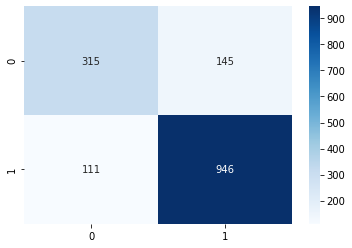

In [345]:
KNN_model3.fit(X,y)
y_final_pred = KNN_model3.predict(X)
print(KNN_model3.score(X,y))

#print(metrics.classification_report(y_test,y_test_pred))
sns.heatmap(confusion_matrix(y,y_final_pred), annot = True, fmt='g', cmap="Blues")

KNN3_final=classification_report(y,y_final_pred,output_dict=True)

KNN3_final_df=round(pd.DataFrame(KNN3_final).transpose(),3)
KNN3_final_acc = KNN3_final_df.iloc[2,0]
KNN3_final_df

*END*